<a href="https://colab.research.google.com/github/s1250103/Public_mori-lab/blob/b__wide/experiments/b_wide/Implement/tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [A-2]環境構築

In [224]:
#@title gdrive マウント
from google.colab import drive
from os import path
if not path.exists('/content/drive'):
  drive.mount('/content/drive')
else:
  print("Already confirm")


Already confirm


In [267]:
import os
desk = '/content/desk'
if not os.path.exists(desk):
  os.mkdir(desk)
os.chdir(desk)

In [3]:
import shutil

shutil.copy2(
    '/content/drive/MyDrive/colab/dence/key20201218.h5',
    desk
  )
              

'/content/desk/key20201218.h5'

In [ ]:
shelf = '/content/drive/MyDrive/colab/dence'
if not os.path.exists(shelf):
  os.mkdir(shelf)

In [69]:
#@title データフォーマットを規定
class video_format:
  name = "video_format"
  # サンプリングされたCMデータの仕様
  playtime = "15秒"
  displaysize = "(any, any, RGB)"
  videoformat = "any"
  # モデルが扱うCMデータ(上のようなデータは、下のように変換される)
  HEIGHT = 45
  WIDTH = 80
  FRAME_SIZE = 30
  COLOR = "RGB"
  FPS = "2 (FRAME_SIZE / playtime)" # 定義ではなく上から導かれた値
  
format1 = video_format()

# [A-1]データ取得・整形

## [A-1-1]データ取得

In [17]:
path_trainData = "/content/drive/MyDrive/train_data"
path_testData = "/content/drive/MyDrive/test_data"

import os
if not os.path.isdir(path_trainData):
  exit()
if not os.path.isdir(path_testData):
  exit()

@confirm train data path
@confirm test data path


In [46]:
class DataWithLabel:
  data = "video data"
  label = "train label"
  def __init__(self, data, label):
    self.data = data
    self.label = label

In [53]:
# ディレクトリ名とラベルとの対応
ruleLabel = {
    '0.other' : 0, 
    '1.food' : 1,
    '2.car' : 2,
    '3.cosme' : 3
    }

In [260]:
import os
import cv2

dwls = []

for dir_class in dir_classes:
  print(dir_class)
  path_dir_class = os.path.join(path_trainData, dir_class)
  videosInTheClass = os.listdir(path_dir_class)
  for videoInTheClass in videosInTheClass:
    path_videoInTheClass = os.path.join(path_dir_class, videoInTheClass)
    print(path_videoInTheClass) # 扱うビデオデータのパスを確認
    video_cvformat = cv2.VideoCapture(path_videoInTheClass)
    label = ruleLabel[dir_class]
    print("Attached the label :", label)

    dwl = DataWithLabel(video_cvformat, label)
    dwls.append(dwl)
    print("________")


0.other
/content/drive/MyDrive/train_data/0.other/いきなり！黄金伝説.mp4
Attached the label : 0
________
/content/drive/MyDrive/train_data/0.other/刑事7人.mp4
Attached the label : 0
________
/content/drive/MyDrive/train_data/0.other/メットライフ生命_MetLife.mp4
Attached the label : 0
________
/content/drive/MyDrive/train_data/0.other/ZURICH_保険_チューリッヒ保険_30秒.mp4
Attached the label : 0
________
/content/drive/MyDrive/train_data/0.other/刑事7人[2].mp4
Attached the label : 0
________
/content/drive/MyDrive/train_data/0.other/Yamato_宅急便コンパクト.mpg
Attached the label : 0
________
/content/drive/MyDrive/train_data/0.other/XFLAG_ゲーム_モンスターストライク超獣神祭.mp4
Attached the label : 0
________
/content/drive/MyDrive/train_data/0.other/au_MOON Challange.mp4
Attached the label : 0
________
/content/drive/MyDrive/train_data/0.other/gsk_薬品_ボルタレン.mp4
Attached the label : 0
________
/content/drive/MyDrive/train_data/0.other/楽天_RMobile.mp4
Attached the label : 0
________
/content/drive/MyDrive/train_data/0.other/楽天_アプリ_ラクマ.mp4
Attac

## [A-1-2]データ整形

In [ ]:
import numpy as np
import math

for count_dwl, dwl in enumerate(dwls):
  print("loading : ", count_dwl)
  framesize = int(dwl.data.get(cv2.CAP_PROP_FRAME_COUNT)) # フレームの数
  cutTiming = math.floor(framesize / format1.FRAME_SIZE)

  cutTail = cutTiming * format1.FRAME_SIZE

  normalVideo = []
  count = 0
  while count <= cutTail - 1:
    IO, frame = dwl.data.read()
    if (count % cutTiming) == 0:
      if not IO:
        print("error in : ", count_dwl) 
        break
      else: 
        fixedFrame = cv2.resize(frame, dsize=(format1.WIDTH, format1.HEIGHT))
        normalVideo.append(fixedFrame)
    else:
      pass

    count += 1

  dwl.data = np.array(normalVideo)

In [ ]:
# 適当なものを選んで見てみる
picks = [39, 40, 89, 112]

for pick in picks:
  sample = dwls[pick].data
  print(pick)
  for i in range(30):
    display_ndarray(sample[i])

In [59]:
import matplotlib.pyplot as plt
import cv2
def display_ndarray(image):
  img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()

In [307]:
#整形データを保存
np.save(os.path.join(desk, 'normalTrainData'), dwls[0].data)
A = np.load('/content/desk/normalTrainData.npy')
display_ndarray(A[0])

In [311]:
videos = []
labels = []
for dwl in dwls:
  videos.append(dwl.data)


In [323]:
np.savez(os.path.join(desk, 'normalTrainVideos'), *videos)
np.savez(os.path.join(desk, 'normalTrainLabels'), *labels)

In [324]:
v = np.load('/content/desk/normalTrainVideos.npz')
l = np.load('/content/desk/normalTrainLabels.npz')

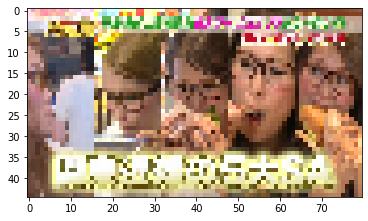

In [327]:
oneVideo = v['arr_0']
display_ndarray(oneVideo[10])

# [A-3]モデルの作成

In [263]:
#@title 入力データの情報を規定
colorSet = {'BW' : 1, 'RGB' : 3}

#入力層の設定
input_frameWIDTH = format1.WIDTH
input_frameHEIGHT = format1.HEIGHT
input_frameSIZE = format1.FRAME_SIZE
input_frameCOLOR = colorSet['RGB']
input_allPattern = input_frameWIDTH * input_frameHEIGHT * input_frameSIZE * input_frameCOLOR

print(
    input_frameWIDTH,
    input_frameHEIGHT,
    input_frameSIZE,
    input_frameCOLOR,
    input_allPattern )

80 45 30 3 324000


In [379]:
#@title モデルの作成
from tensorflow.keras import layers, models, initializers, callbacks
import tensorflow as tf
import numpy as np

seedKey = 20201218

np.random.seed(seedKey)
tf.random.set_seed(seedKey)

model = models.Sequential([
    # 入力層        
    layers.Reshape(
        (input_frameSIZE, input_frameHEIGHT, input_frameWIDTH,  input_frameCOLOR), 
        input_shape=(input_allPattern,),
        name='ENTRANCE' ),
    # 中間層
    layers.Flatten(
        name='RIVER' ),
    layers.Dense(
      1024, # 1024項
      activation='relu',
      name='DAM' ),
    # 出力層
    layers.Dense(4, activation='softmax', name='WATERSUPPLY')
])

name_model = 'key' + str(seedKey)
name_model = name_model + '.h5'
path_model = os.path.join('/content/desk/', name_model)
model.save(path_model)

# del model
# import gc
# gc.collect()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ENTRANCE (Reshape)           (None, 30, 45, 80, 3)     0         
_________________________________________________________________
RIVER (Flatten)              (None, 324000)            0         
_________________________________________________________________
DAM (Dense)                  (None, 1024)              331777024 
_________________________________________________________________
WATERSUPPLY (Dense)          (None, 4)                 4100      
Total params: 331,781,124
Trainable params: 331,781,124
Non-trainable params: 0
_________________________________________________________________


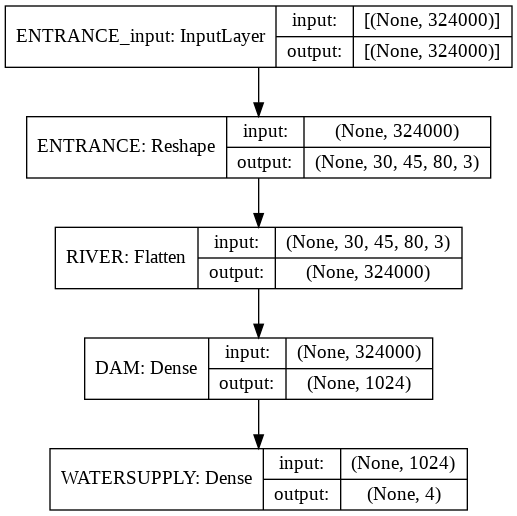

In [353]:
#表示
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(
  model,
  show_shapes=True,
  )

# [A-4]学習

In [ ]:
#@title 学習データ用意
import numpy as np

v = np.load('/content/desk/normalTrainVideos.npz')
l = np.load('/content/desk/normalTrainLabels.npz')

In [ ]:

  train_videos = data['normalTrainVideos.npz']
  train_labels = data['normalTrainLabels.npz']

  # test_examples = data['x_test']
  # test_labels = data['y_test']

In [330]:
print('/content/desk/normalTrainLabels.npz')

/content/desk/normalTrainLabels.npz


In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

train_dataset = tf.data.Dataset.from_tensor_slices((train_examples, train_labels))

In [37]:
#@title 学習データ用意
import numpy as np

try:
  print(videos)
except:
  train_videos = np.load('/content/drive/MyDrive/colab/start/npVideos.npy')  
  train_labels = np.load('/content/drive/MyDrive/colab/start/npLabels.npy')  
  print("Use before data")
else:
  train_videos = fixed_videos.reshape(len(videos), input_allPattern).astype('float32')/255
  train_labels = []
  print("Use recent data")
  for video in videos:
    train_labels.append(LABEL[video.label])
  
  train_labels = tf.keras.utils.to_categorical(train_labels, 4)
  np.save('/content/desk/npVideos', train_videos)
  np.save('/content/desk/npLabels', train_labels)

Use before data


In [350]:
def inverse_dict(d):
    return {v:k for k,v in d.items()}

losses = {
    'CEE' : 'categorical_crossentropy',
    'MSE' : 'mean_squared_error',
    'MSLE' : 'mean_squared_logarithmic_error',
    'MAE' : 'mean_absolute_error',
}
inv_losses = inverse_dict(losses)

In [367]:
type(train_videos)

numpy.ndarray

In [365]:
train_videos = np.array(videos)
train_videos = train_videos.reshape(len(train_videos), input_allPattern).astype('float32')/255
train_videos.shape

(129, 324000)

In [368]:
train_labels = tf.keras.utils.to_categorical(labels, 4)

In [380]:
model.compile(optimizer='adam', 
                loss = 'categorical_crossentropy',
                # loss = 'mean_squared_error',
                metrics=['acc'])

history = model.fit(
      train_videos, 
      train_labels, 
      batch_size=5,
      epochs=40
      )

Epoch 1/40
26/26 [==============================] - 2s 69ms/step - loss: 539.0819 - acc: 0.3208
Epoch 2/40
26/26 [==============================] - 2s 68ms/step - loss: 160.7535 - acc: 0.4729
Epoch 3/40
26/26 [==============================] - 2s 69ms/step - loss: 75.9555 - acc: 0.5632
Epoch 4/40
26/26 [==============================] - 2s 69ms/step - loss: 37.1179 - acc: 0.7044
Epoch 5/40
26/26 [==============================] - 2s 69ms/step - loss: 80.1062 - acc: 0.6131
Epoch 6/40
26/26 [==============================] - 2s 68ms/step - loss: 21.5871 - acc: 0.7473
Epoch 7/40
26/26 [==============================] - 2s 68ms/step - loss: 41.3338 - acc: 0.7555
Epoch 8/40
26/26 [==============================] - 2s 68ms/step - loss: 2.9839 - acc: 0.9397
Epoch 9/40
26/26 [==============================] - 2s 69ms/step - loss: 21.3553 - acc: 0.7477
Epoch 10/40
26/26 [==============================] - 2s 69ms/step - loss: 28.0160 - acc: 0.7683
Epoch 11/40
26/26 [=============================

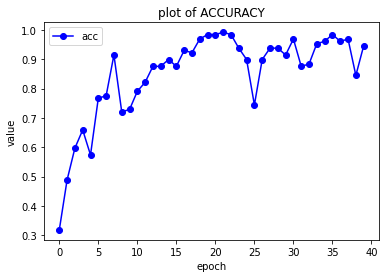

In [381]:
plotAcc(history)

In [375]:
def plotAcc(history):
  fig = plt.figure()
  ACC = fig.add_subplot(1,1,1)

  props = {
      'title' : 'plot of ACCURACY',
      'xlabel' : 'epoch',
      'ylabel' : 'value'
  }
  ACC.set(**props)

  acc = DataFrame(history.history['acc'])
  ACC.plot(acc, label='acc', marker='o', color='blue')

  ACC.legend()

In [348]:
#@title 学習・学習評価設定
def learning(model):
  model.compile(optimizer='adam', 
                loss = losses['CEE'],
                metrics=['acc'])
  
  history = model.fit(
      train_videos, 
      train_labels, 
      batch_size=5,
      epochs=10
      )
  plotAcc(history, now)
  plotLoss(history, now)

  return inv_losses[loss]

import matplotlib.pyplot as plt
from pandas import DataFrame
import os

def plotAcc(history, now):
  fig = plt.figure()
  ACC = fig.add_subplot(1,1,1)

  props = {
      'title' : 'plot of ACCURACY',
      'xlabel' : 'epoch',
      'ylabel' : 'value',
      #  'ylim' : [0.2727,0.27275]
  }
  ACC.set(**props)

  acc = DataFrame(history.history['acc'])
  # val_acc = DataFrame(history.history['val_acc'])
  ACC.plot(acc, label='acc', marker='o', color='blue')
  # ACC.plot(val_acc, label='val_acc', marker='o', linestyle='--', color='orange')

  ACC.legend()

  #画像保存
  name_image = now + '_acc' 
  path_image = os.path.join('/content/desk', name_image)
  fig.savefig(path_image)

def plotLoss(history, now):
  fig = plt.figure()
  LOSS = fig.add_subplot(1,1,1)

  props = {
      'title' : 'plot of LOSS',
      'xlabel' : 'epoch',
      'ylabel' : 'value',
      # 'ylim' : [0, 0.01]
  }
  LOSS.set(**props)

  loss = DataFrame(history.history['loss'])
  # val_loss = DataFrame(history.history['val_loss'])
  LOSS.plot(loss, label='loss', marker='o', color='blue')
  # LOSS.plot(val_loss, label='val_loss', marker='o', linestyle='--', color='orange')

  LOSS.legend()

  #画像保存
  name_image = now + '_loss' 
  path_image= os.path.join('/content/desk', name_image)
  fig.savefig(path_image)

## 学習

In [349]:
import datetime
import time

name_model = 'key20201218.h5'  
path_model = os.path.join('/content/desk/', name_model)

Model = models.load_model(path_model)
date = datetime.datetime.now(datetime.timezone(datetime.timedelta(hours=9)))
dt_now_jst = date.strftime('%H!%M!%S')

try:
   use_loss = learning(Model, dt_now_jst)
except:
  print("error")
else:
  # モデル保存
  when = date.strftime("%Y%m%d") 
  name_model = use_loss + '_' + when

  name_model = name_model + '.h5'
  path_model = os.path.join('/content/desk/', name_model)
  Model.save(path_model)
finally:
  del Model
  import gc
  gc.collect()



error


#ストレージへ保存

In [115]:
shelf = '/content/drive/MyDrive/colab/dence'
if not os.path.exists(shelf):
  os.mkdir(shelf)

In [116]:
wants = [
         '/content/desk/key20201218.h5'
]

In [117]:
import shutil
for want in wants:
  shutil.copy2(
      want,
      shelf
  )
              

In [ ]:
/content/desk/key20201218.h5